<a href="https://colab.research.google.com/github/guipereira42/bootcamp-data-science-alura/blob/main/notebooks/bootcamp_data_science_aula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importação de bibliotecas utilizadas na segunda aula

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Load do arquivo com tratamento de encoding, separador, remoção de linhas de cabeçalho e rodapé e tratamento de números

In [2]:
url = 'https://raw.githubusercontent.com/guipereira42/bootcamp-data-science-alura/main/dados/A111011189_28_143_208.csv'

In [3]:
dados = pd.read_csv(url, encoding = "latin_1", skiprows = 3, skipfooter = 12, sep = ";", thousands=".", decimal=",")
dados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8328381.43,8431334.62,7251287.20,7491953.39,8962121.79,11069824.97,10608659.34,11578639.50,9017298.72,8280299.95,8908581.36,9462158.24,10036160.84,10558973.83,17936150.41,17544666.46,17200302.44,12586384.26,7427454.01,2048596.72,1.073782e+09
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470648.64,3267918.69,3497348.48,3820865.83,4175526.06,5282655.42,5699597.78,5002272.59,4326882.24,3458187.11,2302711.01,1196754.85,4.752903e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14817551.60,16384086.61,19629685.10,18438092.88,19305534.94,18698372.12,18639116.65,18750332.19,20587412.38,21911210.94,27379130.17,22308502.15,27753143.45,24316090.15,23582931.95,20503366.04,16487221.12,5780705.81,2.041004e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2306119.95,2921522.16,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3531874.44,3193708.89,3557821.99,4172285.82,5427226.70,4192540.54,3653281.61,3350272.96,2977820.70,1749906.81,3.493955e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36792954.02,36984314.60,35579251.49,35247659.30,37046350.76,34683341.17,34908420.50,29184688.30,43336950.39,41046394.84,40533687.35,38864252.14,37003357.15,38507479.70,37228236.49,37925512.28,39040849.46,37112818.28,49596845.29,52394753.18,50486914.49,41805551.16,30176865.99,13008678.86,4.950136e+09


In [4]:
dados.tail()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,Total
22,43 Rio Grande do Sul,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,90989887.85,94861008.10,96799643.23,87344269.09,97371100.06,90190767.67,81748880.30,92467100.02,85301000.44,91624338.70,92787953.22,99145915.34,95863320.03,1.030448e+08,98566147.88,94371567.58,96990557.03,91006554.37,88774578.38,97625339.39,85488519.32,84893513.73,76826577.08,87811296.76,96820252.33,1.085619e+08,1.117911e+08,1.102136e+08,1.140316e+08,1.176847e+08,1.202781e+08,1.159394e+08,1.266362e+08,1.690072e+08,1.436689e+08,1.529595e+08,1.334147e+08,88897808.64,27963989.54,1.350319e+10
23,50 Mato Grosso do Sul,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,17143032.30,17435039.90,18239321.45,16963131.37,17677185.62,16363926.26,16149109.15,16902636.63,16964922.58,17259392.23,18147562.63,19143242.28,17905638.97,1.812695e+07,19217982.14,18904364.43,18812185.96,18316480.80,17844511.04,18654501.49,17877667.41,17395566.03,15854121.13,17502042.14,19724932.28,2.364010e+07,2.262677e+07,2.155778e+07,2.204150e+07,2.196512e+07,2.505135e+07,2.480103e+07,2.562918e+07,3.130115e+07,3.247026e+07,3.231448e+07,2.404553e+07,13922456.93,3176552.77,2.485179e+09
24,51 Mato Grosso,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,16075073.71,16479008.11,16011187.69,15357273.96,16834151.93,15474405.82,14234942.30,15055383.98,14478906.98,15976701.25,16026760.63,17304334.81,16131820.19,1.646780e+07,16532335.42,15596133.69,16564324.20,15122951.39,13839763.36,15546808.82,14460507.38,14493916.52,12187688.07,14675991.52,18546814.06,2.068308e+07,2.093764e+07,2.018092e+07,2.045512e+07,1.881650e+07,1.957702e+07,1.886056e+07,2.154142e+07,3.542476e+07,3.718547e+07,3.577889e+07,3.123924e+07,23657444.84,9565726.24,2.356738e+09
25,52 Goiás,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,33575441.63,35477357.75,35422828.46,33846115.75,36125208.07,34944522.80,34133468.84,34795831.02,33306460.20,34977990.37,36250421.27,37889030.63,35426989.48,3.652891e+07,38652034.00,36470414.35,37226960.95,36342052.33,34092088.30,36511343.94,34279160.39,34834721.09,28760754.83,35133025.01,38898447.31,4.594354e+07,4.762276e+07,4.807890e+07,4.572083e+07,4.133576e+07,4.113064e+07,4.262518e+07,4.570529e+07,7.436391e+07,6.782666e+07,6.549414e+07,5.900213e+07,45518873.74,21466079.41,5.311850e+09
26,53 Distrito Federal,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,18400388.35,18783802.78,20291741.30,19388061.07,19677470.12,18397893.23,17564774.75,19662949.33,18270823.61,20046081.24,20602037.52,21101108.01,19361819.39,2.151493e+07,21133361.51,20963621.60,21333585.20,19617400.92,19207148.01,20429251.56,18249176.79,19635925.77,18164306.94,21662370.23,25049609.65,2.644686e+07,2.389234e+07,2.178387e+07,2.310175e+07,2.074774e+07,2.282263e+07,2.448472e+07,2.413936e+07,3.637554e+07,3.560448e+07,3.224661e+07,2.593347e+07,23111104.91,11505510.19,2.749947e+09


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 292 entries, Unidade da Federação to Total
dtypes: float64(169), object(123)
memory usage: 61.7+ KB


In [6]:
pd.options.display.float_format = "{:,.2f}".format

In [7]:
dados.mean()

2007/Ago         304,952.77
2007/Set         788,145.26
2007/Out       2,440,162.96
2007/Nov       5,517,354.05
2007/Dez      12,337,159.42
                 ...       
2021/Abr      77,523,160.28
2021/Mai      81,401,610.00
2021/Jun      67,436,298.31
2021/Jul      47,452,748.71
Total      6,774,431,164.65
Length: 169, dtype: float64

In [8]:
dados['2008/Ago']

0      2,938,286.29
1      1,886,871.84
2      8,331,763.97
3      1,045,291.11
4     23,259,148.28
5      1,550,340.63
6      5,213,290.38
7     14,609,872.57
8     10,645,917.52
9     29,304,821.51
10    10,812,840.19
11    12,673,774.35
12    31,705,296.79
13     9,262,767.68
14     4,543,252.50
15    43,254,543.33
16    80,374,117.08
17    12,384,068.19
18    42,502,172.22
19   180,049,847.37
20    56,699,001.13
21    28,887,854.62
22    56,233,758.74
23     9,602,843.49
24     8,987,811.95
25    21,068,052.99
26    11,548,451.89
Name: 2008/Ago, dtype: float64

In [9]:
dados['2008/Ago'].mean()

26643557.7262963

In [10]:
dados[{"2008/Ago", "2008/Set"}]

,2008/Ago,2008/Set
0,"2,938,286.29","2,843,930.91"
1,"1,886,871.84","2,084,884.80"
2,"8,331,763.97","8,148,089.92"
3,"1,045,291.11","1,003,740.89"
4,"23,259,148.28","23,667,690.01"
5,"1,550,340.63","1,550,166.99"
6,"5,213,290.38","5,201,400.94"
7,"14,609,872.57","15,317,881.85"
8,"10,645,917.52","11,037,940.55"
9,"29,304,821.51","30,435,026.82"


Filtrando colunas onde todos os valores eatão preenchidos

In [11]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0 , "Unidade da Federação")

In [12]:
usaveis = dados[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,Total
0,11 Rondônia,"4,209.37","16,397.03","133,645.19","346,912.84","711,758.31","1,829,559.71","1,940,792.63","1,955,721.68","2,143,353.81","2,280,382.58","2,624,542.97","2,973,421.02","2,938,286.29","2,843,930.91","2,878,153.20","2,780,022.62","2,651,804.89","3,147,566.24","3,082,108.12","4,190,355.33","4,040,251.62","3,946,423.71","3,372,377.96","3,720,608.86","3,787,323.26","3,679,369.94","3,866,146.99","3,667,808.60","3,633,471.79","3,812,315.59","3,911,776.03","4,663,060.75","4,524,544.88","4,778,755.26","4,369,733.23","4,632,439.12","4,464,307.47","4,668,642.02","4,490,368.23",...,"9,492,938.92","8,206,195.92","9,011,612.58","9,124,967.84","8,406,732.72","8,411,360.02","8,651,081.66","8,193,425.99","8,388,269.45","8,645,315.78","9,050,329.13","9,211,262.51","9,490,545.02","8,600,886.20","8,919,190.86","8,909,111.89","8,409,386.09","8,924,348.41","8,948,605.66","8,660,753.05","8,328,381.43","8,431,334.62","7,251,287.20","7,491,953.39","8,962,121.79","11,069,824.97","10,608,659.34","11,578,639.50","9,017,298.72","8,280,299.95","8,908,581.36","9,462,158.24","10,036,160.84","10,558,973.83","17,936,150.41","17,544,666.46","17,200,302.44","12,586,384.26","7,427,454.01","1,073,782,138.81"
1,12 Acre,"10,470.07","14,001.71","86,200.85","301,323.68","769,612.36","1,731,744.62","1,743,978.66","2,057,439.02","2,057,829.69","2,226,577.93","2,112,576.82","2,029,128.01","1,886,871.84","2,084,884.80","2,230,838.45","2,122,013.12","2,196,651.69","2,152,239.30","2,086,775.61","2,476,364.26","2,396,887.63","2,610,261.80","2,174,098.10","2,051,885.16","1,714,707.91","1,341,532.34","2,288,458.90","2,462,712.79","2,254,900.20","2,381,535.93","2,079,981.05","2,564,837.77","2,588,318.06","2,538,525.67","2,319,786.41","2,279,156.60","2,454,599.37","2,578,923.75","2,625,443.29",...,"3,175,575.17","3,060,903.21","3,253,011.61","3,040,645.05","2,926,179.27","3,126,120.64","2,473,454.85","2,277,493.49","2,594,347.32","2,234,388.36","2,473,008.49","2,979,764.77","3,070,533.95","3,249,052.69","3,567,538.64","2,981,072.98","2,998,860.31","3,293,378.97","3,174,249.43","2,959,569.09","3,276,790.55","2,985,763.71","2,939,675.20","2,672,857.33","2,940,827.86","3,914,823.86","4,053,085.41","3,658,265.59","3,470,648.64","3,267,918.69","3,497,348.48","3,820,865.83","4,175,526.06","5,282,655.42","5,699,597.78","5,002,272.59","4,326,882.24","3,458,187.11","2,302,711.01","475,290,315.34"
2,13 Amazonas,"35,752.72","45,570.64","416,012.30","2,020,381.79","5,949,408.99","11,419,210.08","7,934,652.10","8,641,517.13","8,531,576.49","9,079,902.15","8,646,295.77","8,755,806.50","8,331,763.97","8,148,089.92","7,681,661.02","7,761,445.21","7,764,782.66","8,607,222.74","8,385,962.92","9,207,129.28","8,160,517.20","8,562,322.43","9,484,998.71","9,465,068.52","9,267,006.58","9,092,823.55","9,218,407.34","8,674,068.02","8,365,788.46","9,386,945.03","8,373,048.81","10,321,150.01","9,990,164.13","9,767,161.23","9,151,838.50","9,140,196.88","9,437,224.41","9,742,680.49","9,996,686.44",...,"15,381,061.96","14,653,650.77","15,544,595.79","16,374,961.41","15,343,340.93","16,249,963.61","14,255,408.82","14,274,053.94","15,358,914.00","14,100,074.56","16,103,971.89","16,154,491.82","16,529,976.06","15,509,984.83","16,642,220.71","16,493,719.52","15,351,607.47","16,33

In [13]:
usaveis = usaveis.set_index("Unidade da Federação")

In [14]:
usaveis.loc["12 Acre"]

2007/Ago        10,470.07
2007/Set        14,001.71
2007/Out        86,200.85
2007/Nov       301,323.68
2007/Dez       769,612.36
                ...      
2021/Abr     5,002,272.59
2021/Mai     4,326,882.24
2021/Jun     3,458,187.11
2021/Jul     2,302,711.01
Total      475,290,315.34
Name: 12 Acre, Length: 169, dtype: float64

In [15]:
usaveis = usaveis.drop("Total", axis=1)

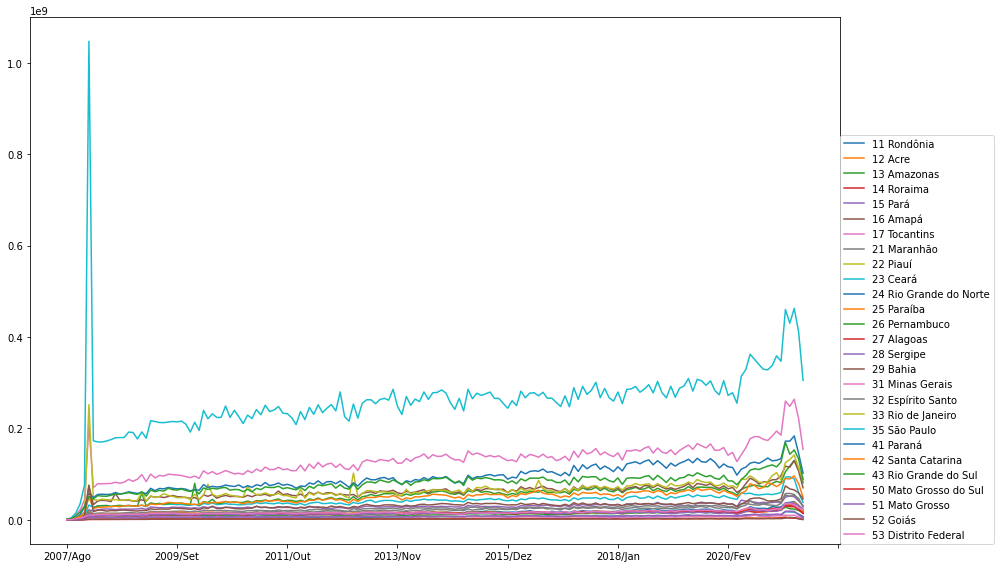

In [16]:
usaveis.T.plot(figsize=(14, 8))
plt.legend(loc=(1, 0))
plt.tight_layout()